### Data Tranformation [float to int]

In [7]:
import pandas as pd

csv_path = "Study Case DA - profiles_psych.csv"

df = pd.read_csv(csv_path)

def format_score(score):
    try:
        if pd.isna(score):
            return ''
        s = float(score)
        if s == int(s):
            return int(s)
        return s
    except:
        return score

df['gtq'] = df['gtq'].apply(format_score)

df.to_csv('cleaned_data_profiles_psych.csv', index=False)

print("DONE")


DONE


### Connection to POSTGRES SUPABASE

In [7]:
import psycopg2
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

USER = os.getenv("POSTGRES_USER")
PASSWORD = os.getenv("PASSWORD")
HOST = os.getenv("HOST")
PORT = os.getenv("PORT")
DBNAME = os.getenv("DATABASE")  # gunakan DATABASE, bukan dbname

try:
    connection = psycopg2.connect(
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT,
        dbname=DBNAME,
        sslmode="require"
    )

    print("Connection successful!")

    cursor = connection.cursor()
    cursor.execute("SELECT NOW();")
    print("Current time:", cursor.fetchone())

    cursor.close()
    connection.close()
    print("Connection closed.")

except Exception as e:
    print("Failed to connect:", e)


Failed to connect: could not translate host name "db.yokbohfrvacrilcahfvz.supabase.co" to address: nodename nor servname provided, or not known



In [17]:
!pip install --upgrade psycopg2-binary psycopg sqlalchemy pandas


  Using cached sqlalchemy-2.0.44-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
Using cached sqlalchemy-2.0.44-cp311-cp311-macosx_11_0_arm64.whl (2.1 MB)
Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.54
    Uninstalling SQLAlchemy-1.4.54:
      Successfully uninstalled SQLAlchemy-1.4.54
  Attempting uninstall: pandas━━━━━━━━━━━━━━━━━━ 0/3 [sqlalchemy]
    Found existing installation: pandas 2.3.0 0/3 [sqlalchemy]
    Uninstalling pandas-2.3.0:━━━━╸━━━━━━━━━━━━━ 2/3 [pandas]
      Successfully uninstalled pandas-2.3.0m━━━━━━━━━━━━━ 2/3 [pandas]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-airflo

In [18]:
import psycopg2
psycopg2.__version__

import psycopg
psycopg.__version__


'3.2.13'

In [ ]:
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

host = os.getenv("SUPA_HOST")
port = os.getenv("SUPA_PORT")
db_name = os.getenv("DBNAME")
user = os.getenv("SUPA_USER")
password = os.getenv("PASSWORD")
password_encoded = quote_plus(password)

# Susun connection string
connection_str = f"postgresql://{user}:{password_encoded}@{host}:{port}/{db_name}"

# Test koneksi
print(f"\nMencoba connect ke database:")
print(f"- Host : {host}")
print(f"- Port : {port}")
print(f"- DB   : {db_name}")
print(f"- User : {user}")

try:
    engine = create_engine(connection_str)
    with engine.connect() as conn:
        conn.execute(text("SELECT 1"))
        print("\n✅ KONEKSI SUKSES!")

except Exception as e:
    print("\n❌ MASIH GAGAL.")
    print(f"Detail Error: {e}")


=== ENV VARIABLES LOADED ===
Host        : aws-1-ap-northeast-1.pooler.supabase.com
Port        : 6543
DB Name     : postgres
User        : postgres.yokbohfrvacrilcahfvz
Password    : RA***in (hidden)

Mencoba connect ke database:
- Host : aws-1-ap-northeast-1.pooler.supabase.com
- Port : 6543
- DB   : postgres
- User : postgres.yokbohfrvacrilcahfvz

✅ KONEKSI SUKSES!


In [ ]:
import pandas as pd
from sqlalchemy import text # <--- Wajib import ini

query_cek_tabel = """
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'public'
"""

try:
    with engine.connect() as connection:
        df_tables = pd.read_sql(text(query_cek_tabel), connection)
    
    print("📂 Daftar Tabel (via Engine):")
    display(df_tables)
    
except Exception as e:
    print(f"Error: {e}")

📂 Daftar Tabel (via Engine):


,table_name
0,dim_companies
1,dim_areas
2,dim_positions
3,dim_departments
4,dim_directorates
5,dim_grades
6,dim_majors
7,dim_competency_pillars
8,dim_divisions
9,dim_education


### Connection to POSTGRES LOCAL DOCKER

In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text

# Load environment variables

load_dotenv()

USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD_LOCAL")
HOST = os.getenv("HOST_LOCAL")
PORT = os.getenv("PORT_LOCAL")
DBNAME = os.getenv("DATABASE_LOCAL")  # pastikan di .env ada DATABASE=nama_db

# Create SQLAlchemy engine

engine = create_engine(f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

try:
# Test connection
    with engine.connect() as conn:
        result = conn.execute(text("SELECT NOW();"))
        current_time = result.fetchone()[0]
        print("Connection successful! Current time:", current_time)

except Exception as e:
    print("Failed to connect:", e)


Connection successful! Current time: 2025-11-23 06:21:13.504739+00:00


### Analysis

In [2]:
import os
import pandas as pd
import psycopg2 # Kita pakai ini biar bebas error 'cursor'
from dotenv import load_dotenv
import matplotlib.pyplot as pltplt
import seaborn as sns
from math import pi

# Load file .env
load_dotenv()

# Setup tampilan Pandas biar gak kepotong
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Libraries loaded & Environment configured.")

✅ Libraries loaded & Environment configured.


In [3]:
def get_db_connection():
    """Membuat koneksi ke database Postgres Local via Psycopg2"""
    try:
        conn = psycopg2.connect(
            user=os.getenv("USER"),
            password=os.getenv("PASSWORD_LOCAL"),
            host=os.getenv("HOST_LOCAL"),
            port=os.getenv("PORT_LOCAL"),
            database=os.getenv("DATABASE_LOCAL")
        )
        print("✅ Database connection established.")
        return conn
    except Exception as e:
        print(f"❌ Connection Error: {e}")
        return None


In [10]:
def fetch_all_data():
    conn = get_db_connection()
    if not conn: return None, None, None, None

    # 1. Main Dataset: Performance + Context + Psychometric (One row per employee-year)
    # Kita ambil SEMUA tahun performa
    query_main = """
    SELECT 
        e.employee_id,
        e.fullname,
        e.years_of_service_months,
        py.year as rating_year,
        py.rating,
        pp.iq,
        pp.pauli,
        pp.faxtor,
        pp.disc,
        pp.mbti,
        dg.name as grade_name,
        de.name as education_name
    FROM performance_yearly py
    JOIN employees e ON py.employee_id = e.employee_id
    LEFT JOIN profiles_psych pp ON e.employee_id = pp.employee_id
    LEFT JOIN dim_grades dg ON e.grade_id = dg.grade_id
    LEFT JOIN dim_education de ON e.education_id = de.education_id
    """
    df_main = pd.read_sql(query_main, conn)

    # 2. Competency Data
    query_comp = """
    SELECT 
        cy.employee_id,
        cy.year,
        dcp.pillar_label,
        cy.score as competency_score
    FROM competencies_yearly cy
    JOIN dim_competency_pillars dcp ON cy.pillar_code = dcp.pillar_code
    """
    df_comp = pd.read_sql(query_comp, conn)

    # 3. Papi Kostick Scores
    query_papi = "SELECT employee_id, scale_code, score FROM papi_scores"
    df_papi = pd.read_sql(query_papi, conn)

    # 4. Strengths (Gallup)
    query_strength = "SELECT employee_id, rank, theme FROM strengths"
    df_strength = pd.read_sql(query_strength, conn)

    conn.close()
    print("✅ Data Loaded Successfully")
    print(f"- Main Data: {df_main.shape}")
    print(f"- Competency Data: {df_comp.shape}")
    print(f"- PAPI Data: {df_papi.shape}")
    print(f"- Strengths Data: {df_strength.shape}")
    
    return df_main, df_comp, df_papi, df_strength

# Eksekusi Fetch
df_main, df_comp, df_papi, df_strength = fetch_all_data()

# Labeling: Kita tandai baris mana yang merupakan High Performance (Rating 5)
df_main['Group'] = df_main['rating'].apply(lambda x: 'High Performer (5)' if x == 5 else 'Others (<5)')

✅ Database connection established.


/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/1884403767.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql(query_main, conn)
/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/1884403767.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_comp = pd.read_sql(query_comp, conn)
/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/1884403767.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_papi = pd.read_sql(query_papi, conn)
/var/folders/s8/7rbrz1

✅ Data Loaded Successfully
- Main Data: (10050, 12)
- Competency Data: (100500, 4)
- PAPI Data: (40200, 3)
- Strengths Data: (28140, 3)


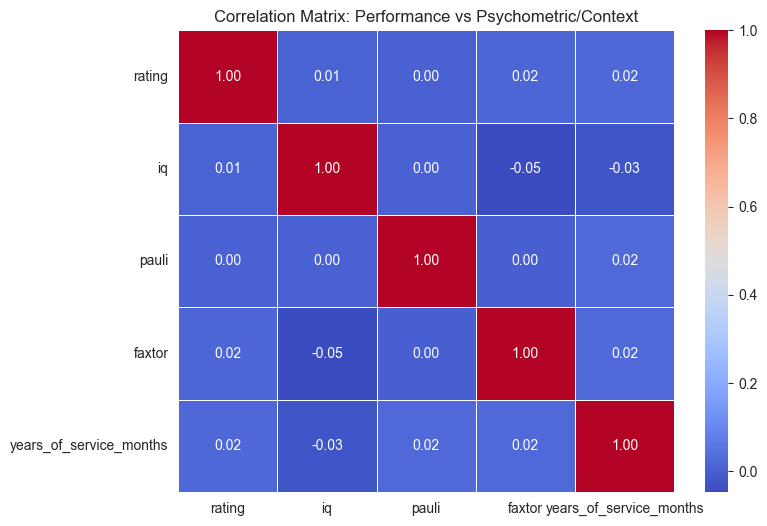

/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/843988750.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='iq', data=df_main, ax=axes[0], palette='Set2')
/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/843988750.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='pauli', data=df_main, ax=axes[1], palette='Set2')
/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/843988750.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='years_of_service_months'

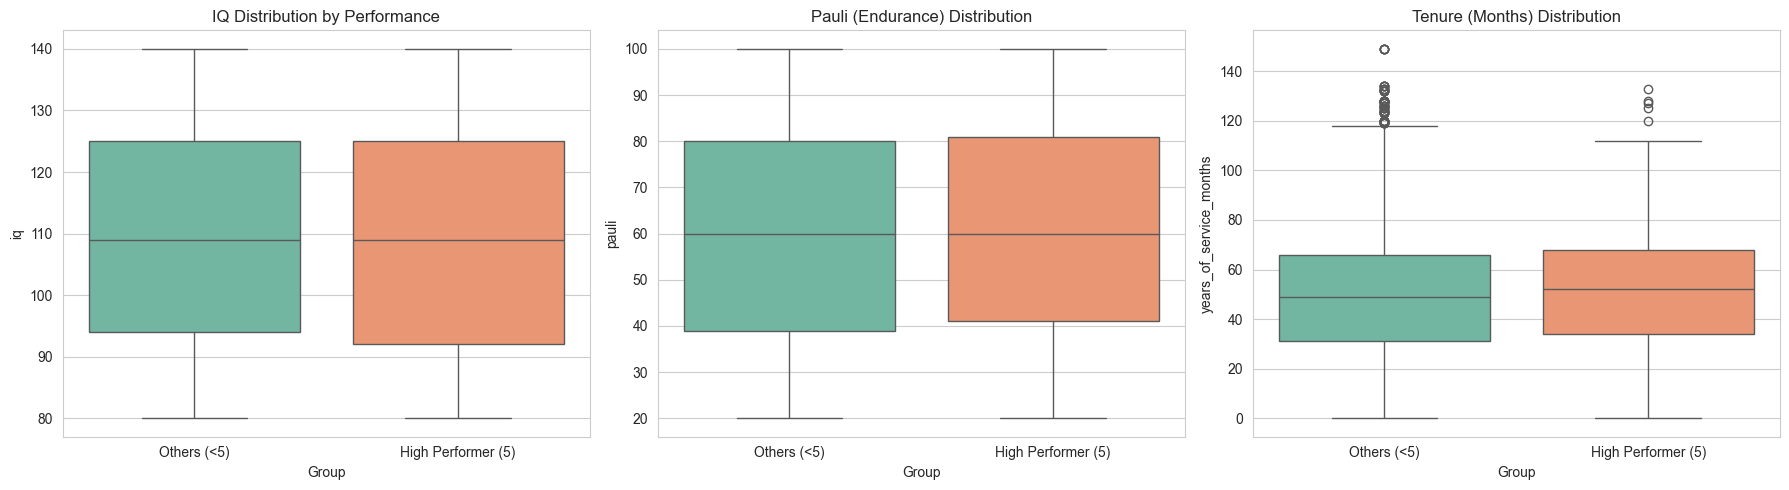

In [11]:
# --- A. Heatmap Korelasi ---
# Kita hanya ambil kolom numerik untuk korelasi
cols_to_corr = ['rating', 'iq', 'pauli', 'faxtor', 'years_of_service_months']
corr_matrix = df_main[cols_to_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Performance vs Psychometric/Context")
plt.show()

# --- B. Comparison Boxplots (Distribusi) ---
# Membandingkan IQ, Pauli, dan Masa Kerja antara High Performer vs Others
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Group', y='iq', data=df_main, ax=axes[0], palette='Set2')
axes[0].set_title('IQ Distribution by Performance')

sns.boxplot(x='Group', y='pauli', data=df_main, ax=axes[1], palette='Set2')
axes[1].set_title('Pauli (Endurance) Distribution')

sns.boxplot(x='Group', y='years_of_service_months', data=df_main, ax=axes[2], palette='Set2')
axes[2].set_title('Tenure (Months) Distribution')

plt.tight_layout()
plt.show()

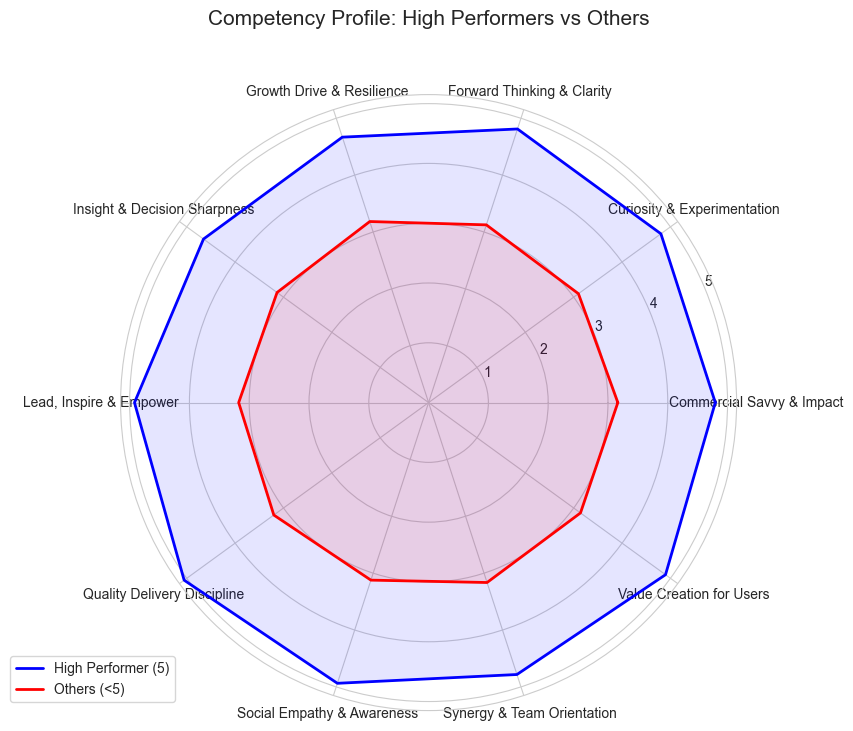

In [12]:
# Gabungkan data kompetensi dengan status High Performer dari df_main
# Kita butuh tahu mana employee_id yang pernah dapat rating 5 di tahun tersebut
df_comp_merged = df_comp.merge(df_main[['employee_id', 'rating_year', 'Group']], 
                               left_on=['employee_id', 'year'], 
                               right_on=['employee_id', 'rating_year'])

# Hitung rata-rata skor kompetensi per Grup
radar_data = df_comp_merged.groupby(['Group', 'pillar_label'])['competency_score'].mean().unstack()

# --- Fungsi Membuat Radar Chart ---
def plot_radar_chart(df_radar):
    categories = list(df_radar.columns)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Menutup loop lingkaran

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Plot untuk setiap Group
    colors = {'High Performer (5)': 'blue', 'Others (<5)': 'red'}
    
    for group_name in df_radar.index:
        values = df_radar.loc[group_name].values.flatten().tolist()
        values += values[:1] # Menutup loop
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=group_name, color=colors.get(group_name, 'grey'))
        ax.fill(angles, values, alpha=0.1, color=colors.get(group_name, 'grey'))

    plt.xticks(angles[:-1], categories, size=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Competency Profile: High Performers vs Others", size=15, y=1.1)
    plt.show()

plot_radar_chart(radar_data)

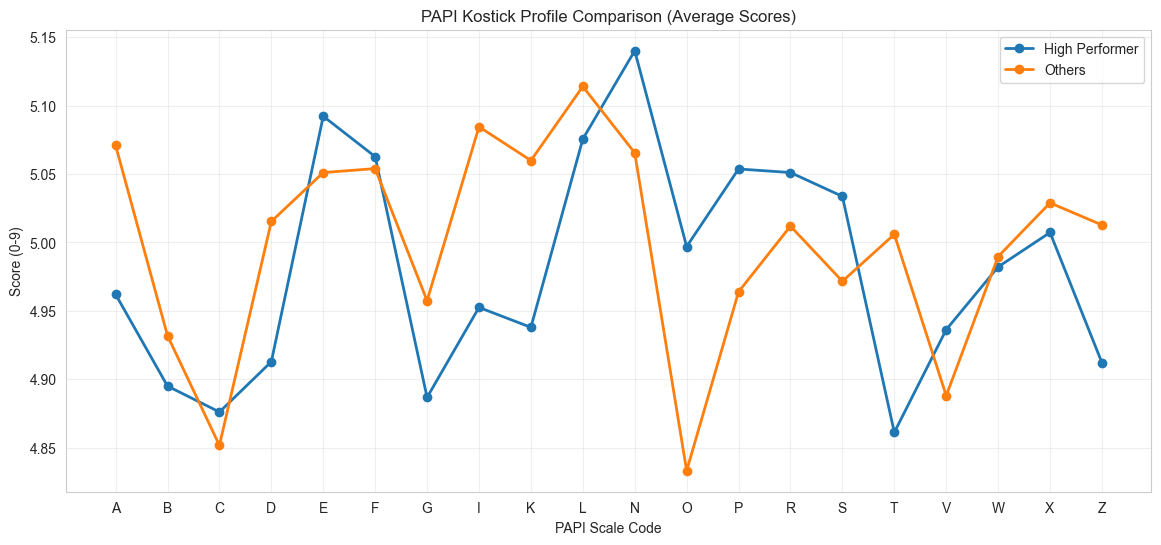

In [18]:
# Ambil hanya bagian setelah "Papi_"
x_labels = [col.split("_")[1] if "_" in col else col for col in papi_summary.columns]

plt.figure(figsize=(14, 6))
for group in papi_summary.index:
    plt.plot(x_labels, papi_summary.loc[group], marker='o', label=group, linewidth=2)

plt.title("PAPI Kostick Profile Comparison (Average Scores)")
plt.xlabel("PAPI Scale Code")
plt.ylabel("Score (0-9)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/var/folders/s8/7rbrz1_906l_8xlv7kls3tdr0000gn/T/ipykernel_43772/3748958377.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_strengths_high.values, y=top_strengths_high.index, palette='viridis')


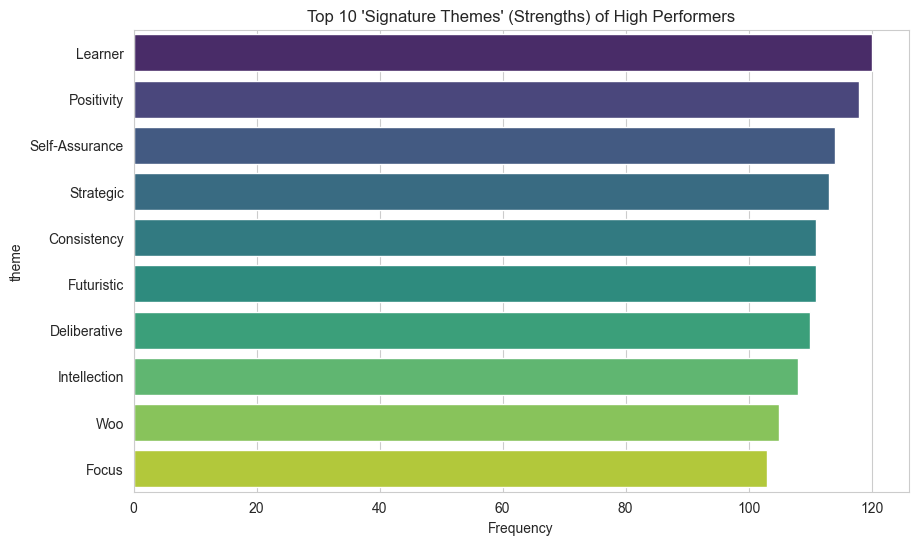

In [30]:
# Filter strength hanya untuk karyawan High Performer
df_strength['Group'] = df_strength['employee_id'].apply(lambda x: 'High Performer' if x in high_performer_ids else 'Others')

# Ambil Top 5 Strengths dari High Performers (Rank 1-5) dan hilangkan yang kosong atau spasi
top_strengths_high = (
    df_strength[
        (df_strength['Group'] == 'High Performer') &
        (df_strength['rank'] <= 5)
    ]['theme']
    .dropna()  # hilangkan NaN
    .map(str.strip)  # hapus spasi di awal/akhir
    .replace('', pd.NA)  # ubah string kosong jadi NA
    .dropna()  # hilangkan string kosong setelah strip
    .value_counts()
    .head(10)
)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=top_strengths_high.values, y=top_strengths_high.index, palette='viridis')
plt.title("Top 10 'Signature Themes' (Strengths) of High Performers")
plt.xlabel("Frequency")
plt.show()

# Catatan: Nilai NULL, string kosong '', atau spasi ' ' tidak dimasukkan ke grafik


# Executive Summary: The DNA of a High Performer

Berdasarkan data historis, IQ dan Masa Kerja (Tenure) tidak menentukan kesuksesan. Seorang High Performer (Rating 5) di perusahaan ini dibedakan oleh Soft Skills (Kompetensi), Mentalitas Belajar (Learner), dan Gaya Kepemimpinan (Leadership), bukan oleh kemampuan kognitif mentah (Raw IQ) atau ketahanan kerja mekanis (Pauli).

## 1. Analisis Faktor Pembeda (Differentiators)

### A. Kompetensi Adalah Kunci Utama (The "Widest Gap")

**Observasi:** Pada Radar Chart, garis biru (High Performers) berada jauh di luar garis merah (Others) di semua pilar.

**Key Insight:** Pembeda terbesar bukan pada kemampuan teknis dasar, melainkan pada kemampuan strategis dan inovasi:

* **Forward Thinking & Clarity:** Kemampuan melihat ke depan.
* **Curiosity & Experimentation:** Keinginan mencoba hal baru.
* **Commercial Savvy & Impact:** Pemahaman bisnis.

**Kesimpulan:** High Performer adalah mereka yang strategic dan business-oriented, bukan sekadar pelaksana tugas.

### B. Profil Perilaku: The "Learner" Mindset

**Observasi:** Pada Bar Chart Strengths, tema Learner (Pembelajar) menempati peringkat #1 dengan frekuensi tertinggi, diikuti oleh Positivity dan Self-Assurance.

**Key Insight:**

* **Learner:** Mereka selalu ingin berkembang.
* **Positivity & Self-Assurance:** Mereka memiliki kepercayaan diri dan energi positif yang menular.
* **Strategic & Futuristic:** Mereka visioner.

### C. Gaya Kerja (PAPI Kostick): Leaders, Not Just Doers

**Observasi:** Pada Line Chart PAPI:

* **Scale L (Leadership Role):** High Performer (Biru) melonjak tajam dibandingkan Others (Oranye). Mereka nyaman memimpin.
* **Scale N (Need to Finish):** High Performer sedikit lebih tinggi, menunjukkan ketuntasan kerja.
* **Scale G (Hard Work/Intense):** Menariknya, High Performer justru lebih rendah dibanding Others.

**Key Insight:** High Performer bekerja lebih cerdas (Smart) dan memimpin, sementara Low Performer cenderung bekerja keras secara fisik/intens (Hard) tapi kurang strategis.

## 2. Analisis "Non-Faktor" (The Anti-Pattern)

Sangat penting untuk menyoroti apa yang TIDAK berpengaruh agar rekrutmen tidak bias.

**IQ & Pauli Tidak Relevan:**

* Pada Boxplot, median IQ antara High Performer dan Others nyaris identik (sekitar 110).
* Skor Pauli (ketahanan) juga setara (sekitar 60).

**Masa Kerja Bukan Jaminan:**

* Distribusi tenure (masa kerja) sama persis. Karyawan lama tidak otomatis menjadi High Performer.

**Bukti Statistik:**

* Heatmap Correlation mengonfirmasi hal ini dengan angka korelasi 0.00 - 0.01 antara Rating dengan IQ/Pauli/Tenure.

## 3. Final Success Formula (Deliverable)

Berdasarkan temuan di atas, berikut adalah formulasi logika untuk menentukan kandidat yang memiliki probabilitas tinggi menjadi High Performer.

**Logika: "The Strategic Learner Model"**

Seorang kandidat dinilai "High Potential Match" jika memenuhi kriteria berikut (Weighted Logic):

**Competency Threshold (Syarat Mutlak):**

* Rata-rata Skor Kompetensi Strategis (Forward Thinking, Commercial Savvy) ≥ 3.5 (dari skala 5).

**Behavioral Match (Strengths):**

* Memiliki setidaknya 1 dari Top 3 Strengths: Learner, Positivity, Self-Assurance.
* Atau memiliki kombinasi Strategic + Futuristic.

**Work Style (PAPI):**

* Score L (Leadership) > 5 (Cenderung memimpin).
* Score G (Hard Work) < 7 (Tidak sekadar "grinding", tapi bekerja efektif).

**Cognitive (Filter Minimal):**

* IQ cukup di rentang rata-rata (≥ 100). Ingat: Lebih tinggi tidak menambah peluang sukses.


In [ ]:
IF (Competency_Avg >= 3.5) 
   AND (Strength IN ['Learner', 'Positivity', 'Strategic'])
   AND (PAPI_L >= 5)
THEN
   Match_Score = 100% (High Potential)
ELSE IF (Competency_Avg >= 3.0) AND (IQ >= 100)
   Match_Score = 70% (Medium Potential)
ELSE
   Match_Score = Low Potential

### CTE

In [ ]:
/* ---------------------------------------------------------------------------
   TALENT MATCHING ENGINE - THE STRATEGIC LEARNER FRAMEWORK (NO YEAR FILTER)
   ---------------------------------------------------------------------------
   Database: PostgreSQL (Supabase)
   Output: Ranking Kandidat dengan Detail Skor per TGV
   ---------------------------------------------------------------------------
*/

WITH 

-- 1. DEFINE BENCHMARK SOURCE (REVISED)
-- Mengambil semua karyawan yang PERNAH dapat rating 5 (sepanjang sejarah data).
-- Menggunakan DISTINCT agar karyawan yang dapat rating 5 berkali-kali hanya dihitung sekali.
selected_benchmarks AS (
    SELECT DISTINCT employee_id 
    FROM performance_yearly 
    WHERE rating = 5 
),

-- 2. HITUNG BASELINE NUMERIC & PAPI (Rata-rata Benchmark)
benchmark_stats AS (
    SELECT 
        -- Numeric Baselines
        AVG(pp.iq) as base_iq,
        AVG(pp.pauli) as base_pauli,
        AVG(pp.gtq_total) as base_gtq,
        
        -- PAPI Baselines (Pivot manual sederhana untuk performa)
        AVG(CASE WHEN ps.scale_code = 'N' THEN ps.score END) as base_papi_n,
        AVG(CASE WHEN ps.scale_code = 'G' THEN ps.score END) as base_papi_g,
        AVG(CASE WHEN ps.scale_code = 'A' THEN ps.score END) as base_papi_a,
        AVG(CASE WHEN ps.scale_code = 'L' THEN ps.score END) as base_papi_l,
        AVG(CASE WHEN ps.scale_code = 'P' THEN ps.score END) as base_papi_p,
        AVG(CASE WHEN ps.scale_code = 'I' THEN ps.score END) as base_papi_i,
        AVG(CASE WHEN ps.scale_code = 'T' THEN ps.score END) as base_papi_t,
        AVG(CASE WHEN ps.scale_code = 'V' THEN ps.score END) as base_papi_v,
        AVG(CASE WHEN ps.scale_code = 'S' THEN ps.score END) as base_papi_s,
        AVG(CASE WHEN ps.scale_code = 'C' THEN ps.score END) as base_papi_c,
        AVG(CASE WHEN ps.scale_code = 'D' THEN ps.score END) as base_papi_d,
        AVG(CASE WHEN ps.scale_code = 'R' THEN ps.score END) as base_papi_r,
        AVG(CASE WHEN ps.scale_code = 'Z' THEN ps.score END) as base_papi_z, -- Inverse
        AVG(CASE WHEN ps.scale_code = 'E' THEN ps.score END) as base_papi_e,
        AVG(CASE WHEN ps.scale_code = 'K' THEN ps.score END) as base_papi_k  -- Inverse
        
    FROM selected_benchmarks sb
    JOIN profiles_psych pp ON sb.employee_id = pp.employee_id
    JOIN papi_scores ps ON sb.employee_id = ps.employee_id
),

-- 3. HITUNG BASELINE STRENGTHS (Top 5 Themes Paling Sering Muncul)
benchmark_top_strengths AS (
    SELECT ARRAY_AGG(theme) as base_themes
    FROM (
        SELECT s.theme
        FROM selected_benchmarks sb
        JOIN strengths s ON sb.employee_id = s.employee_id
        WHERE s.rank <= 5 -- Ambil hanya top 5 per benchmark employee
        GROUP BY s.theme
        ORDER BY COUNT(*) DESC -- Urutkan berdasarkan frekuensi kemunculan
        LIMIT 5 -- Ambil 5 tema teratas dari populasi benchmark
    ) sub
),

-- 4. PREPARE CANDIDATE DATA (Pivot PAPI & Array Strengths per Karyawan)
candidate_data AS (
    SELECT 
        e.employee_id,
        e.fullname,
        pp.iq, pp.pauli, pp.gtq_total,
        
        -- Pivot PAPI Scores Kandidat
        MAX(CASE WHEN ps.scale_code = 'N' THEN ps.score END) as papi_n,
        MAX(CASE WHEN ps.scale_code = 'G' THEN ps.score END) as papi_g,
        MAX(CASE WHEN ps.scale_code = 'A' THEN ps.score END) as papi_a,
        MAX(CASE WHEN ps.scale_code = 'L' THEN ps.score END) as papi_l,
        MAX(CASE WHEN ps.scale_code = 'P' THEN ps.score END) as papi_p,
        MAX(CASE WHEN ps.scale_code = 'I' THEN ps.score END) as papi_i,
        MAX(CASE WHEN ps.scale_code = 'T' THEN ps.score END) as papi_t,
        MAX(CASE WHEN ps.scale_code = 'V' THEN ps.score END) as papi_v,
        MAX(CASE WHEN ps.scale_code = 'S' THEN ps.score END) as papi_s,
        MAX(CASE WHEN ps.scale_code = 'C' THEN ps.score END) as papi_c,
        MAX(CASE WHEN ps.scale_code = 'D' THEN ps.score END) as papi_d,
        MAX(CASE WHEN ps.scale_code = 'R' THEN ps.score END) as papi_r,
        MAX(CASE WHEN ps.scale_code = 'Z' THEN ps.score END) as papi_z,
        MAX(CASE WHEN ps.scale_code = 'E' THEN ps.score END) as papi_e,
        MAX(CASE WHEN ps.scale_code = 'K' THEN ps.score END) as papi_k,

        -- Aggregasi Strengths Kandidat ke dalam Array (Top 5 saja)
        ARRAY(
            SELECT theme 
            FROM strengths s 
            WHERE s.employee_id = e.employee_id AND s.rank <= 5
        ) as my_top_themes

    FROM employees e
    LEFT JOIN profiles_psych pp ON e.employee_id = pp.employee_id
    LEFT JOIN papi_scores ps ON e.employee_id = ps.employee_id
    GROUP BY e.employee_id, e.fullname, pp.iq, pp.pauli, pp.gtq_total
),

-- 5. CORE CALCULATION: Hitung Match Score per Variable (TV)
tv_scores AS (
    SELECT 
        c.employee_id,
        c.fullname,
        
        -- A. Numeric Logic (Threshold: Jika > Benchmark = 100%, Jika < kena penalty)
        CASE WHEN c.iq >= b.base_iq THEN 100 
             ELSE GREATEST(0, 100 - (((b.base_iq - c.iq)::numeric / NULLIF(b.base_iq,0)) * 100 * 1.5)) END as m_iq, -- 1.5 multiplier penalty
             
        CASE WHEN c.pauli >= b.base_pauli THEN 100 
             ELSE GREATEST(0, 100 - (((b.base_pauli - c.pauli)::numeric / NULLIF(b.base_pauli,0)) * 100)) END as m_pauli,

        -- B. PAPI Logic (Distance: 100 - |Diff| * 11.1)
        -- Ini otomatis handle Inverse Scale (Z, K) karena kita cari kedekatan jarak
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_n,0) - b.base_papi_n) * 11.1)) as m_papi_n,
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_a,0) - b.base_papi_a) * 11.1)) as m_papi_a,
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_l,0) - b.base_papi_l) * 11.1)) as m_papi_l,
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_i,0) - b.base_papi_i) * 11.1)) as m_papi_i,
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_z,0) - b.base_papi_z) * 11.1)) as m_papi_z, -- Inverse handled
        GREATEST(0, 100 - (ABS(COALESCE(c.papi_c,0) - b.base_papi_c) * 11.1)) as m_papi_c,
        
        -- C. Strengths Logic (Array Overlap)
        -- Menghitung berapa banyak tema kandidat yang ada di Top 5 Benchmark
        (
            SELECT COUNT(*) 
            FROM UNNEST(c.my_top_themes) AS t 
            WHERE t = ANY(bs.base_themes)
        )::numeric / 5.0 * 100 as m_strengths_overlap

    FROM candidate_data c
    CROSS JOIN benchmark_stats b
    CROSS JOIN benchmark_top_strengths bs
),

-- 6. GROUPING KE TGV (Talent Group Variables)
tgv_scores AS (
    SELECT 
        employee_id,
        fullname,
        
        -- TGV 1: Cognitive Complexity (30%)
        -- Gabungan IQ + Papi_I (Decision) + Strength Overlap (Strategic/Analytical proxy)
        (m_iq + m_papi_i + m_strengths_overlap) / 3.0 as tgv_cognitive,
        
        -- TGV 2: Motivation & Drive (25%)
        -- Gabungan Pauli + Papi_N (Hard Worker) + Papi_A (Achiever)
        (m_pauli + m_papi_n + m_papi_a) / 3.0 as tgv_motivation,
        
        -- TGV 3: Leadership & Influence (20%)
        -- Proxy: Papi_L (Leadership Role) + Strength Overlap (Command proxy)
        (m_papi_l + m_strengths_overlap) / 2.0 as tgv_leadership,
        
        -- TGV 4: Adaptability (15%)
        -- Proxy: Papi_Z (Change - Inverse)
        (m_papi_z) as tgv_adaptability, 
        
        -- TGV 5: Reliability (10%)
        -- Proxy: Papi_C (Order)
        (m_papi_c) as tgv_reliability

    FROM tv_scores
)

-- 7. FINAL CALCULATION & OUTPUT
SELECT 
    employee_id,
    fullname,
    
    -- Skor per TGV (Rounded)
    ROUND(tgv_cognitive::numeric, 1) as "Cognitive (30%)",
    ROUND(tgv_motivation::numeric, 1) as "Motivation (25%)",
    ROUND(tgv_leadership::numeric, 1) as "Leadership (20%)",
    ROUND(tgv_adaptability::numeric, 1) as "Adaptability (15%)",
    ROUND(tgv_reliability::numeric, 1) as "Reliability (10%)",
    
    -- Final Weighted Score
    ROUND(
        (tgv_cognitive * 0.30) +
        (tgv_motivation * 0.25) +
        (tgv_leadership * 0.20) +
        (tgv_adaptability * 0.15) +
        (tgv_reliability * 0.10)
    ::numeric, 2) as final_match_rate

FROM tgv_scores
ORDER BY final_match_rate DESC;